In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
import cvxpy as cp

In [2]:
rng = np.random.default_rng(0)
n, T = 100, 100
m = list(range(60, 81, 2))
k = list(range(30, 51, 2))


RECOVERY_TOL = 1e-2
probabilities_noncvx = np.zeros((len(m), len(k)))
probabilities_cvx = np.zeros((len(m), len(k)))

for time in range(T):
    print(f"Trial {time+1} of {T}")
    for kk in k:
        x0 = np.zeros((n,))
        ind = rng.permutation(n)
        ind = ind[0:kk]
        x0[ind] = rng.standard_normal((kk,)) * 5
        
        for mm in m:
            A = rng.standard_normal((mm, n))
            y = A @ x0
            
            # nonconvex recovery
            x = cp.Variable((n, ))
            prob = cp.Problem(cp.Minimize(cp.sum(cp.sqrt(cp.abs(x)))), [A @ x == y])
            prob.solve(nlp=True, solver=cp.KNITRO, verbose=False, algorithm=1, honorbnds=1)
            x_noncvx_recovery = x.value      
    
            # convex recovery
            x = cp.Variable((n, ))
            prob = cp.Problem(cp.Minimize(cp.norm1(x)), [A @ x == y])
            prob.solve(solver=cp.CLARABEL)
            x_cvx_recovery = x.value

            # were the recoveries successful?
            noncvx_success = LA.norm(x_noncvx_recovery - x0, 2) / LA.norm(x0, 2) <= RECOVERY_TOL
            cvx_success = LA.norm(x_cvx_recovery - x0, 2) / LA.norm(x0, 2) <= RECOVERY_TOL
            probabilities_noncvx[m.index(mm), k.index(kk)] += int(noncvx_success)
            probabilities_cvx[m.index(mm), k.index(kk)] += int(cvx_success)


probabilities_cvx /= T
probabilities_noncvx /= T

Trial 1 of 100
Trial 2 of 100
Trial 3 of 100
Trial 4 of 100
Trial 5 of 100
Trial 6 of 100
Trial 7 of 100
Trial 8 of 100
Trial 9 of 100
Trial 10 of 100
Trial 11 of 100
Trial 12 of 100
Trial 13 of 100


/home/daniel/Documents/Research/2025/nonconvex-modeling/cvxpy-ipopt/cvxpy/problems/problem.py:1611: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Trial 14 of 100
Trial 15 of 100
Trial 16 of 100
Trial 17 of 100
Trial 18 of 100
Trial 19 of 100
Trial 20 of 100
Trial 21 of 100
Trial 22 of 100
Trial 23 of 100
Trial 24 of 100
Trial 25 of 100
Trial 26 of 100
Trial 27 of 100
Trial 28 of 100
Trial 29 of 100
Trial 30 of 100
Trial 31 of 100
Trial 32 of 100
Trial 33 of 100
Trial 34 of 100
Trial 35 of 100
Trial 36 of 100
Trial 37 of 100
Trial 38 of 100
Trial 39 of 100
Trial 40 of 100
Trial 41 of 100
Trial 42 of 100
Trial 43 of 100
Trial 44 of 100
Trial 45 of 100
Trial 46 of 100
Trial 47 of 100
Trial 48 of 100
Trial 49 of 100
Trial 50 of 100
Trial 51 of 100
Trial 52 of 100
Trial 53 of 100
Trial 54 of 100
Trial 55 of 100
Trial 56 of 100
Trial 57 of 100
Trial 58 of 100
Trial 59 of 100
Trial 60 of 100
Trial 61 of 100
Trial 62 of 100
Trial 63 of 100
Trial 64 of 100
Trial 65 of 100
Trial 66 of 100
Trial 67 of 100
Trial 68 of 100
Trial 69 of 100
Trial 70 of 100
Trial 71 of 100
Trial 72 of 100
Trial 73 of 100
Trial 74 of 100
Trial 75 of 100
Trial 76

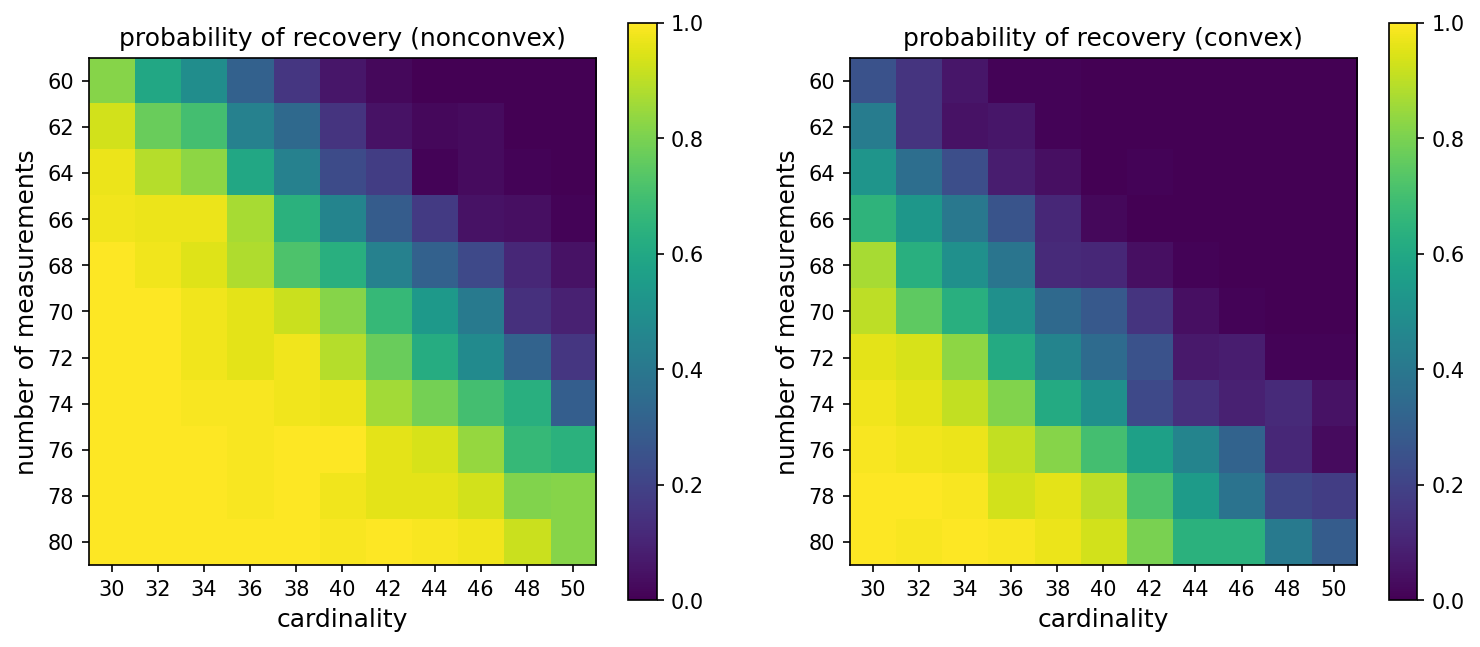

In [3]:
# save data
np.savez("sparse_recovery_data.npz", m=m, k=k, probabilities_noncvx=probabilities_noncvx, probabilities_cvx=probabilities_cvx)

fig = plt.figure(figsize=[12, 5], dpi=150)
ax = plt.subplot(1, 2, 1)

plt.xticks(range(len(k)), k)
plt.xlabel("cardinality", fontsize=12)
plt.yticks(range(len(m)), m)
plt.ylabel("number of measurements", fontsize=12)

a = ax.imshow(probabilities_noncvx, interpolation="none")
fig.colorbar(a)
ax.set_title(r"probability of recovery (nonconvex)")
ax = plt.subplot(1, 2, 2)
b = ax.imshow(probabilities_cvx, interpolation="none")
fig.colorbar(b)
plt.xticks(range(len(k)), k)
plt.xlabel("cardinality", fontsize=12)
plt.yticks(range(len(m)), m)
plt.ylabel("number of measurements", fontsize=12)
ax.set_title(r"probability of recovery (convex)")

plt.savefig("sparse_recovery.pdf")

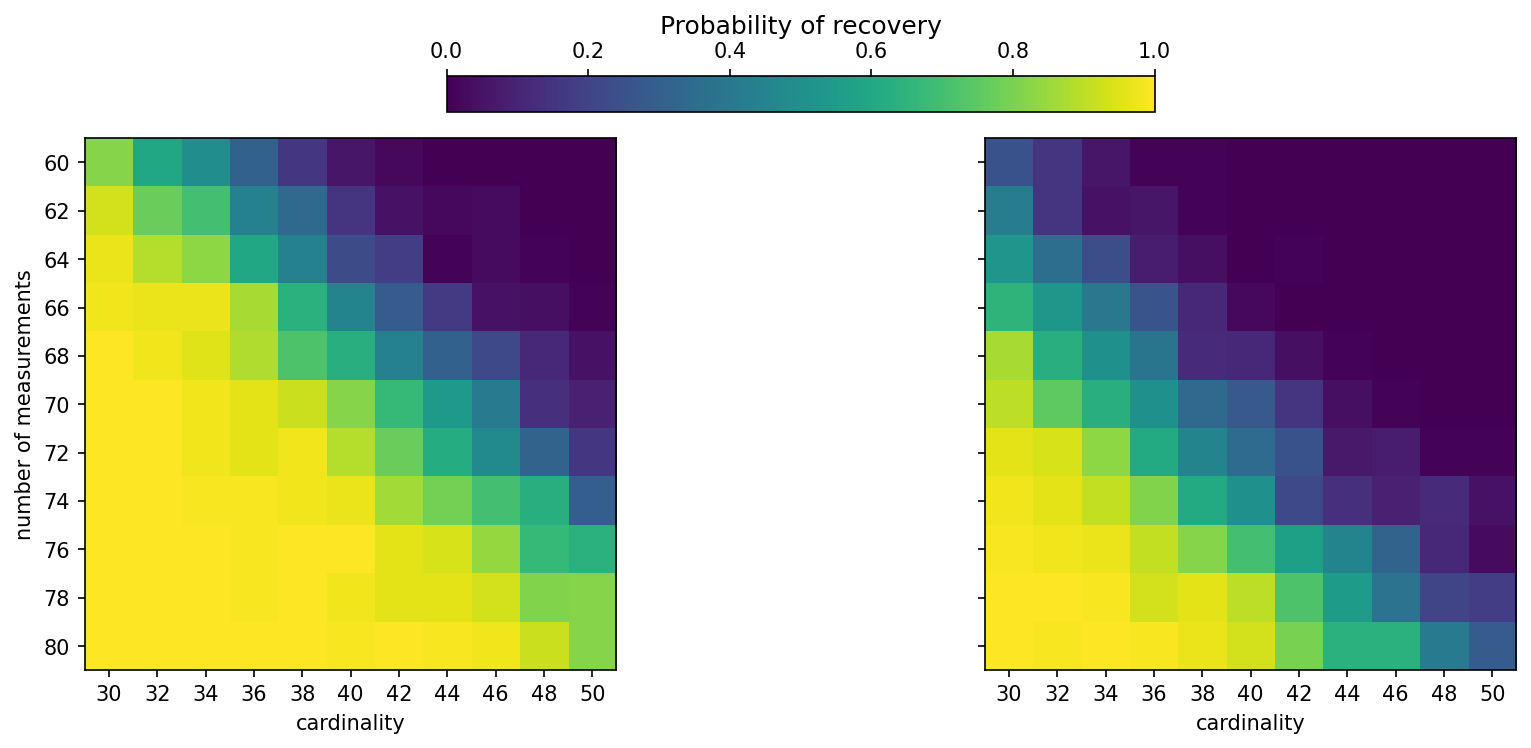

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150, constrained_layout=True, sharey=True)

im1 = axes[0].imshow(probabilities_noncvx, interpolation="none")
axes[0].set_xticks(range(len(k))); axes[0].set_xticklabels(k)
axes[0].set_yticks(range(len(m))); axes[0].set_yticklabels(m)
axes[0].set_xlabel("cardinality")
axes[0].set_ylabel("number of measurements")
#axes[0].set_title(" (nonconvex)")

im2 = axes[1].imshow(probabilities_cvx, interpolation="none")
axes[1].set_xticks(range(len(k))); axes[1].set_xticklabels(k)
axes[1].set_yticks(range(len(m))); axes[1].set_yticklabels(m)
axes[1].set_xlabel("cardinality")
#axes[1].set_ylabel("number of measurements")
#axes[1].set_title("probability of recovery (convex)")

# Shared colorbar on top
cbar = fig.colorbar(im1, ax=axes, location='top', orientation='horizontal', shrink=0.4)
cbar.set_label("Probability of recovery", fontsize=12)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1, hspace=-0.5)


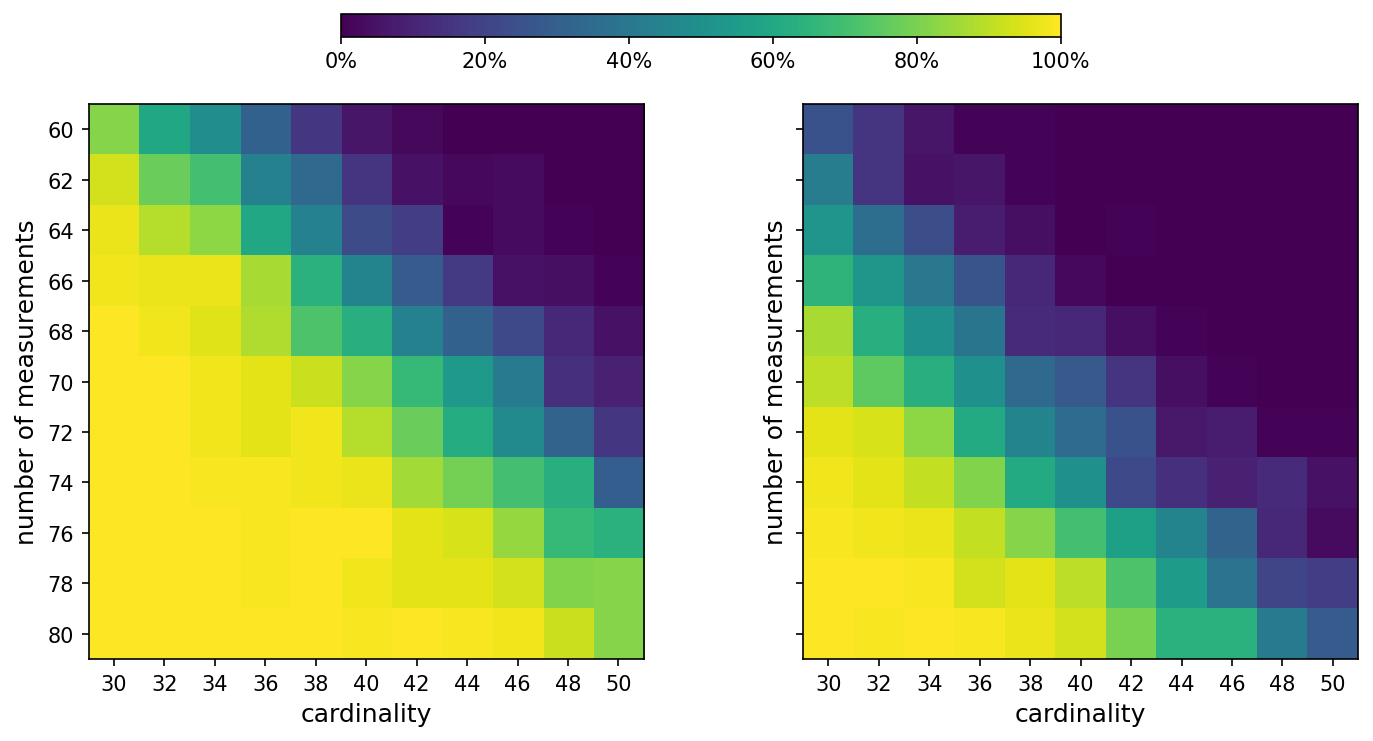

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150, sharey=True,
                         gridspec_kw={'wspace': 0.05})

im1 = axes[0].imshow(probabilities_noncvx, interpolation="none")
axes[0].set_xticks(range(len(k))); axes[0].set_xticklabels(k)
axes[0].set_yticks(range(len(m))); axes[0].set_yticklabels(m)
axes[0].set_xlabel("cardinality", fontsize=12)
axes[0].set_ylabel("number of measurements", fontsize=12)
#axes[0].set_title("nonconvex")

im2 = axes[1].imshow(probabilities_cvx, interpolation="none")
axes[1].set_xticks(range(len(k))); axes[1].set_xticklabels(k)
axes[1].set_yticks(range(len(m))); axes[1].set_yticklabels(m)
axes[1].set_xlabel("cardinality", fontsize=12)
axes[1].set_ylabel("number of measurements", fontsize=12)
#axes[1].set_title("probability of recovery (convex)")

# Shared colorbar on top
# Shared colorbar placed in a fixed figure slot (doesn't change subplot sizes)
from matplotlib.ticker import PercentFormatter

cax = fig.add_axes([0.3, 0.94, 0.4, 0.03])  # [left, bottom, width, height] in figure coords
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal')
cbar.ax.xaxis.set_major_formatter(PercentFormatter(xmax=1.0))
fig.subplots_adjust(top=0.85)
plt.savefig("sparse_recovery_colorbar_top.pdf")